I want to create a MLP classifier for my task

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python==4.5.5.64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [ ]:
!pip show opencv-python

Name: opencv-python
Version: 4.5.5.64
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Code', 'test_functions.ipynb', 'CW_Dataset1', 'CW_Dataset', 'Personal_Dataset', 'Models']


In [ ]:
#path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset','CV2024_CW_Dataset.zip' )

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CV2024_CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CV2024_CW_Dataset.zip

In [ ]:
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from skimage import data, exposure

%matplotlib inline

In [ ]:
# Function to load images from the 'images' directory and their labels from text files in the 'labels' directory
def import_images_and_labels(root_path):
    images = []
    labels = []

    # Define paths to images and labels directories
    images_path = os.path.join(root_path, 'images')
    labels_path = os.path.join(root_path, 'labels')

    # Get sorted list of image files
    image_files = sorted([f for f in os.listdir(images_path)])

    for image_file in image_files:
        # Read the image
        image_path = os.path.join(images_path, image_file)
        images.append(io.imread(image_path))

        # Read the corresponding label
        label_file = image_file.replace('.jpeg', '.txt')
        label_path = os.path.join(labels_path, label_file)
        with open(label_path, 'r') as file:
            label = file.read().strip()
            labels.append(int(label))

    return images, labels

In [ ]:
#Load the images and the corresponding labels in X and y
X, y = import_images_and_labels('train')

In [ ]:
#In the svm_code file I have defined a function to do the preprocessing of the images.
#That function resizes all the images, converts into greyscale, applies the Histogram equalization and add a filter to sharpen the datials.
#I want to do the same preprocessing of the images before feeding them into a MLP. This is to compare the performance of the SVM and MLP, having the same preprocessed data.

from skimage import io, color, filters
def preprocess_images(images, target_size=(128, 150)):
    preprocessed_images = []

    for img in images:
        # Resize the image
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        # Convert the resized image to grayscale
        img_gray = color.rgb2gray(img_resized)

        # Apply histogram equalization
        img_hist_eq = exposure.equalize_hist(img_gray)

        # Apply sharpening filter
        img_sharp = filters.unsharp_mask(img_hist_eq, radius=1, amount=2)

        preprocessed_images.append(img_sharp)

    return preprocessed_images

In [ ]:
X_preprocessed = preprocess_images(X)

In [ ]:
# Print the shape of the first 3 preprocessed images to verify
for img in X_preprocessed[:3]:
    print(np.array(img).shape)

(150, 128)
(150, 128)
(150, 128)


In [ ]:
#Now let's extract the HOG feature descriptor from each image

from skimage.feature import hog

X_hog = [hog(image, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(2, 2),
              visualize=False, multichannel=False, feature_vector=True)
              for image in X_preprocessed]

<ipython-input-19-9ae36fcb1cf9>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X_hog = [hog(image, orientations=8, pixels_per_cell=(8, 8),


In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_hog, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Create a classifier: Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier



classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42, verbose= True)

classifier.fit(X_train, y_train)

Iteration 1, loss = 1.01370685
Iteration 2, loss = 0.60525114
Iteration 3, loss = 0.54507779
Iteration 4, loss = 0.49664786
Iteration 5, loss = 0.47073874
Iteration 6, loss = 0.44467824
Iteration 7, loss = 0.41907845
Iteration 8, loss = 0.39978010
Iteration 9, loss = 0.38288787
Iteration 10, loss = 0.36643127
Iteration 11, loss = 0.35191206
Iteration 12, loss = 0.32952413
Iteration 13, loss = 0.31396170
Iteration 14, loss = 0.31401980
Iteration 15, loss = 0.29859967
Iteration 16, loss = 0.28153673
Iteration 17, loss = 0.26895892
Iteration 18, loss = 0.25543146
Iteration 19, loss = 0.24251951
Iteration 20, loss = 0.24778835
Iteration 21, loss = 0.23743843
Iteration 22, loss = 0.22241917
Iteration 23, loss = 0.20792708
Iteration 24, loss = 0.19278935
Iteration 25, loss = 0.18594594
Iteration 26, loss = 0.17923472
Iteration 27, loss = 0.16928120
Iteration 28, loss = 0.16109159
Iteration 29, loss = 0.15359857
Iteration 30, loss = 0.14411820
Iteration 31, loss = 0.13399459
Iteration 32, los

MLPClassifier(max_iter=300, random_state=42, verbose=True)

In [ ]:
# Evaluate the model
print("Training score: {:.2f}".format(classifier.score(X_train, y_train)))
print("Validation score: {:.2f}".format(classifier.score(X_val, y_val)))

Training score: 1.00
Validation score: 0.84


In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
print(f"""Classification report for classifier {classifier}:\n
      {metrics.classification_report(y_val, y_pred)}""")

Classification report for classifier MLPClassifier(max_iter=300, random_state=42, verbose=True):

                    precision    recall  f1-score   support

           0       0.60      0.43      0.50        75
           1       0.87      0.95      0.91       388
           2       0.50      0.06      0.11        16

    accuracy                           0.84       479
   macro avg       0.66      0.48      0.51       479
weighted avg       0.82      0.84      0.82       479



The training score 1.00 and validation score 0.84 suggets overfitting of the data into the model. To tackle this let's try to add L2 normaliation. Here's an updates MLP classifier.

In [ ]:
classifier = MLPClassifier(
    hidden_layer_sizes=(100,),  # Number of neurons in the hidden layer
    max_iter=100,              # Maximum number of iterations
    alpha=1e-4,                # L2 penalty (regularization term) parameter
    solver='sgd',              # Solver for weight optimization
    verbose=True,              # Whether to print progress messages to stdout
    random_state=1,            # Seed for random number generator
    learning_rate_init=.1,     # Initial learning rate
    early_stopping=True,       # Using early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,   # The proportion of training data to set aside as validation set for early stopping
    n_iter_no_change=10        # Number of iterations with no improvement to wait before stopping the training
)

In [ ]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.18244046
Validation score: 0.817708
Iteration 2, loss = 0.57975684
Validation score: 0.817708
Iteration 3, loss = 0.56767500
Validation score: 0.817708
Iteration 4, loss = 0.52671743
Validation score: 0.708333
Iteration 5, loss = 0.61236067
Validation score: 0.817708
Iteration 6, loss = 0.52097854
Validation score: 0.817708
Iteration 7, loss = 0.68320212
Validation score: 0.817708
Iteration 8, loss = 0.46054627
Validation score: 0.817708
Iteration 9, loss = 0.48817166
Validation score: 0.817708
Iteration 10, loss = 0.47228686
Validation score: 0.817708
Iteration 11, loss = 0.43660425
Validation score: 0.817708
Iteration 12, loss = 0.36359848
Validation score: 0.848958
Iteration 13, loss = 0.32993988
Validation score: 0.859375
Iteration 14, loss = 0.45011249
Validation score: 0.718750
Iteration 15, loss = 0.37019065
Validation score: 0.864583
Iteration 16, loss = 0.29500027
Validation score: 0.869792
Iteration 17, loss = 0.30282506
Validation score: 0.369792
Iterat

MLPClassifier(early_stopping=True, learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=True)

In [ ]:
# Evaluate the model
print("Training score: {:.2f}".format(classifier.score(X_train, y_train)))
print("Validation score: {:.2f}".format(classifier.score(X_val, y_val)))

Training score: 0.89
Validation score: 0.84


In [ ]:
#Let's now save the model
from joblib import dump

path_to_save =os.path.join(GOOGLE_DRIVE_PATH, 'Models', 'mlp_classifier.joblib')
dump(classifier, path_to_save)

['drive/My Drive/Colab Notebooks/CW_Folder_UG/Models/mlp_classifier.joblib']

In [ ]:
#Let's extract the test images and their label and let's apply all the pre processing of the data

X_test, y_test = import_images_and_labels('test')

def preprocess_images(images, target_size=(128, 150)):
    preprocessed_images = []

    for img in images:
        # Resize the image
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        # Convert the resized image to grayscale
        img_gray = color.rgb2gray(img_resized)

        # Apply histogram equalization
        img_hist_eq = exposure.equalize_hist(img_gray)

        # Apply sharpening filter
        img_sharp = filters.unsharp_mask(img_hist_eq, radius=1, amount=2)

        preprocessed_images.append(img_sharp)

    return preprocessed_images

X_preprocessed = preprocess_images(X_test)

In [ ]:
#Extracting the HOG feature descriptors
X_test_hog = [hog(image, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(2, 2),
              visualize=False, multichannel=False, feature_vector=True)
              for image in X_preprocessed]

<ipython-input-44-23feab48a2c6>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X_test_hog = [hog(image, orientations=8, pixels_per_cell=(8, 8),


In [ ]:
#load the classifier
from joblib import load
path_classifier = os.path.join(GOOGLE_DRIVE_PATH, 'Models', 'mlp_classifier.joblib')
classifier = load(path_classifier)

In [ ]:
y_pred = classifier.predict(X_test_hog)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.48      0.39      0.43        51
           1       0.89      0.95      0.92       388
           2       0.00      0.00      0.00        19

    accuracy                           0.85       458
   macro avg       0.45      0.45      0.45       458
weighted avg       0.80      0.85      0.83       458

Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


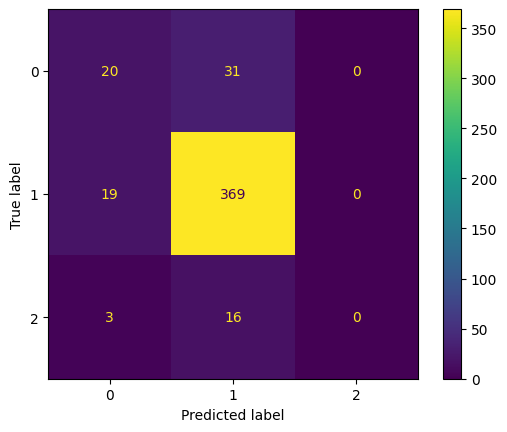

In [ ]:
#Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

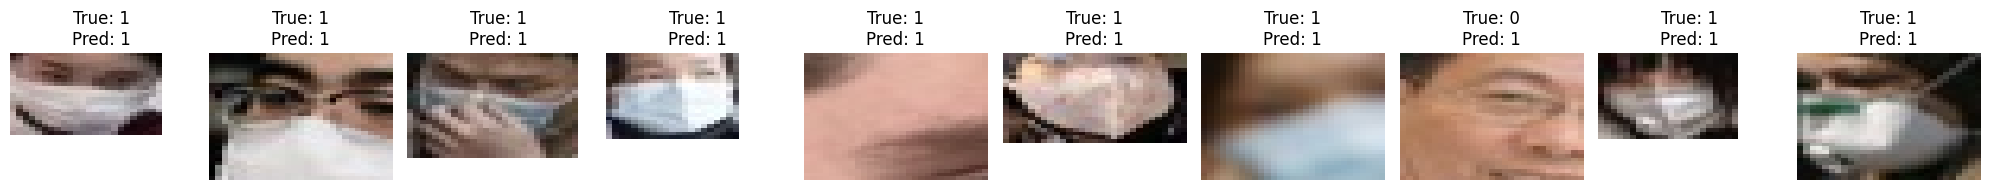

In [ ]:
from sklearn.utils import shuffle
#shuffle the images everytime I run this cell
X_test_shuffled, y_test_shuffled, y_pred_shuffled = shuffle(X_test, y_test, y_pred, random_state=None)

# Number of images to display
num_images = 10

# Create the plot
fig, axes = plt.subplots(1, num_images, figsize=(20, 2), sharex=True, sharey=True)
for i, ax in enumerate(axes):
    # Display the original image
    ax.imshow(X_test_shuffled[i], cmap='gray', aspect='auto')  # 'aspect=auto' lets the image retain its original aspect ratio
    # Set the title with the true label and predicted label
    ax.set_title(f'True: {y_test_shuffled[i]}\nPred: {y_pred_shuffled[i]}')
    ax.axis('off')  # Turn off axis markers and labels

plt.tight_layout()
plt.show()